# Scenario 1

## One proportion z test

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [3]:
count = 28
nobs = 94
value = .16
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

2.9229268377264077 0.0034675798365736213


#### p-value is above .05 keeping the null hypothesis

# Scenario 2

### Chi test

In [5]:
Antiseptics = pd.read_csv("C:/Users/Lenovo/Downloads/antiseptics.zip")
Antiseptics.head()

,Clinic,Antiseptic Type,Number of applications
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38


In [9]:
Antiseptics.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [10]:
Antiseptics.head()

,Clinic,AS,Count
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38


In [12]:
Antiseptics_pivot = pd.pivot_table(Antiseptics,index='AS',columns='Clinic',values="Count")
Antiseptics_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [13]:
stats.chi2_contingency(Antiseptics_pivot)

Chi2ContingencyResult(statistic=1.225920250023835, pvalue=0.9755850789571424, dof=6, expected_freq=array([[ 21.95121951,  34.09756098,  87.95121951],
       [ 73.32317073, 113.8953252 , 293.78150407],
       [  8.99390244,  13.97052846,  36.03556911],
       [ 45.73170732,  71.03658537, 183.23170732]]))

####  p value is above .05, keeping the null hypothesis.

# Scenario 3

### one way ANOVA

In [14]:
savings = pd.read_csv("C:/Users/Lenovo/Downloads/savings.zip")
savings.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


In [15]:
savings_expanded=pd.melt(savings,var_name='Group', value_name='$')

In [16]:
savings_expanded

,Group,$
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18
...,...,...
227,Group D,12180.86
228,Group D,12972.11
229,Group D,12068.83
230,Group D,16064.42


In [26]:
savings_expanded = savings_expanded.replace(savings.columns, [0,1,2,3])
savings_expanded.head()

,Group,$
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


## Plot dependent variable

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2996\1140281390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(savings.values[~np.isnan(savings.values)])


<Axes: ylabel='Density'>

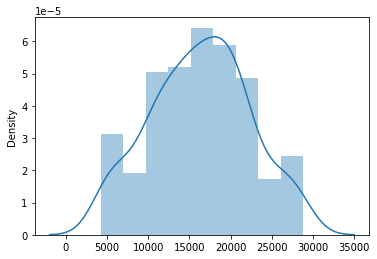

In [18]:
sns.distplot(savings.values[~np.isnan(savings.values)])

In [22]:
scipy.stats.bartlett(savings_expanded['$'], savings_expanded['Group'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

In [27]:
scipy.stats.fligner(savings_expanded['$'], savings_expanded['Group'])

FlignerResult(statistic=nan, pvalue=nan)

In [31]:
savings_expanded.dropna(inplace=True)

In [32]:
stats.f_oneway(savings_expanded['$'][savings_expanded['Group']==0],
              savings_expanded['$'][savings_expanded['Group']==1],
              savings_expanded['$'][savings_expanded['Group']==2],
              savings_expanded['$'][savings_expanded['Group']==3])

F_onewayResult(statistic=203.25514198903812, pvalue=1.993359557800572e-61)

#### p value is less than .05, there is a differences between groups

# Scenario 4

### Two Proportion Z Test

In [33]:
stat, pval = proportions_ztest([374,171], [374+129, 171+74])
print(stat, pval)

1.3156546893290748 0.18828996870412507


In [ ]:
### the p value is more than .05 there is no difference